In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

### Optional (If using Colab)

In [2]:
#import sys
#sys.path.append("/content/drive/MyDrive/COMS4995/COMS4995_Project")
#sys.path

### Optional (Install necessary dependecy in colab)

In [1]:
!pip install category_encoders
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Users/Vince/opt/anaconda3/lib/python3.8/site-packages (1.0.1)


In [2]:
from dataset.Preprocess import Preprocess, MissingHandler
from dataset.Encoder import DateHourEncoder, DateWeekEncoder, DateMonthEncoder, DateYearEncoder
from utils.read_file import read_from_csv
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'dataset'

### Read data

In [34]:
file = "./data/transaction.csv"
df = read_from_csv(file)
df

Load DataFrame!


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90.0,...,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,9.0,...,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,2.0,...,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,9.0,...,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False


### Transformation

#### Transform Date variable

In [35]:
he = DateHourEncoder("%Y-%m-%dT%H:%M:%S")
me = DateMonthEncoder("%Y-%m-%dT%H:%M:%S")
we = DateWeekEncoder("%Y-%m-%dT%H:%M:%S")
ye = DateYearEncoder("%Y-%m-%dT%H:%M:%S")

df["transactionDateTime_hour"] = he.transform(df["transactionDateTime"])
df["transactionDateTime_weekday"] = we.transform(df["transactionDateTime"])
df["transactionDateTime_month"] = me.transform(df["transactionDateTime"])
# df["transactionDateTime_year"] = ye.transform(df["transactionDateTime"])

# df["accountOpenDate_year"] = DateYearEncoder("%Y-%m-%d").transform(df["accountOpenDate"])
# df["accountOpenDate_weekday"] = DateWeekEncoder("%Y-%m-%d").transform(df["accountOpenDate"])
# df["accountOpenDate_month"] = DateMonthEncoder("%Y-%m-%d").transform(df["accountOpenDate"])

# df["dateOfLastAddressChange_year"] = DateYearEncoder("%Y-%m-%d").transform(df["dateOfLastAddressChange"])
# df["dateOfLastAddressChange_weekday"] = DateWeekEncoder("%Y-%m-%d").transform(df["dateOfLastAddressChange"])
# df["dateOfLastAddressChange_month"] = DateMonthEncoder("%Y-%m-%d").transform(df["dateOfLastAddressChange"])

# df["currentExpDate_year"] = DateYearEncoder("%m/%Y").transform(df["currentExpDate"])
# df["currentExpDate_month"] = DateMonthEncoder("%m/%Y").transform(df["currentExpDate"])

#### Transform CVV

In [36]:
df['matchingCVV'] = df['cardCVV'] == df['enteredCVV']

In [37]:
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,transactionDateTime_hour,transactionDateTime_weekday,transactionDateTime_month,matchingCVV
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,NaN,False,NaN,NaN,False,False,14,5,8,True
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,NaN,True,NaN,NaN,False,False,5,1,10,True
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,NaN,False,NaN,NaN,False,False,9,1,11,True
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,NaN,False,NaN,NaN,False,False,2,5,12,True
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,NaN,True,NaN,NaN,False,False,21,3,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90.0,...,NaN,False,NaN,NaN,False,False,18,3,12,True
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,9.0,...,NaN,False,NaN,NaN,False,False,16,6,12,True
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,2.0,...,NaN,False,NaN,NaN,False,False,15,1,12,True
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,9.0,...,NaN,False,NaN,NaN,False,False,0,3,12,True


### Remove some unwanted Variables

In [38]:
df = df.drop(["accountNumber", 
              "accountOpenDate", 
              "dateOfLastAddressChange", 
              "currentExpDate", 
              "transactionDateTime"], axis=1)

In [39]:
df

,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,transactionDateTime_hour,transactionDateTime_weekday,transactionDateTime_month,matchingCVV
0,737265056,5000.0,5000.00,98.55,Uber,US,US,2.0,1.0,rideshare,...,NaN,False,NaN,NaN,False,False,14,5,8,True
1,737265056,5000.0,5000.00,74.51,AMC #191138,US,US,9.0,1.0,entertainment,...,NaN,True,NaN,NaN,False,False,5,1,10,True
2,737265056,5000.0,5000.00,7.47,Play Store,US,US,9.0,1.0,mobileapps,...,NaN,False,NaN,NaN,False,False,9,1,11,True
3,737265056,5000.0,5000.00,7.47,Play Store,US,US,9.0,1.0,mobileapps,...,NaN,False,NaN,NaN,False,False,2,5,12,True
4,830329091,5000.0,5000.00,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,...,NaN,True,NaN,NaN,False,False,21,3,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,50000.0,48904.96,119.92,Lyft,US,US,90.0,1.0,rideshare,...,NaN,False,NaN,NaN,False,False,18,3,12,True
786359,732852505,50000.0,48785.04,18.89,hulu.com,US,US,9.0,1.0,online_subscriptions,...,NaN,False,NaN,NaN,False,False,16,6,12,True
786360,732852505,50000.0,48766.15,49.43,Lyft,US,US,2.0,1.0,rideshare,...,NaN,False,NaN,NaN,False,False,15,1,12,True
786361,732852505,50000.0,48716.72,49.89,walmart.com,US,US,9.0,99.0,online_retail,...,NaN,False,NaN,NaN,False,False,0,3,12,True


### Change some data type
We notice that some data type is int64 or float but actually a categorical data, so we need to change those data into categorical data

In [40]:
# objects = ["customerId",
#            "transactionDateTime_hour", 
#            "transactionDateTime_weekday", 
#            "transactionDateTime_weekday", 
#            "transactionDateTime_month", 
#            "transactionDateTime_year", 
#            "accountOpenDate_year", 
#            "accountOpenDate_weekday", 
#            "accountOpenDate_month", 
#            "dateOfLastAddressChange_year", 
#            "dateOfLastAddressChange_weekday", 
#            "dateOfLastAddressChange_month", 
#            "currentExpDate_year", 
#            "currentExpDate_month"]
#df = df.drop('merchantCategoryCode', axis=1)
objects = ["customerId", 
           "posEntryMode",
           "posConditionCode",
           "cardCVV", 
           "enteredCVV", 
           "cardLast4Digits",
           "transactionDateTime_hour", 
           "transactionDateTime_weekday", 
           "transactionDateTime_weekday", 
           "transactionDateTime_month"]
# objects = ["transactionDateTime_hour", 
#            "transactionDateTime_weekday", 
#            "transactionDateTime_weekday", 
#            "transactionDateTime_month", 
#            "transactionDateTime_year"]
df[objects] = df[objects].astype(object)

ValueError: Columns must be same length as key

### Randomly sample from the Dataset (optional)
Dataset are extremely huge in this cases, so, we can choose to sample part of the data from the dataset

In [45]:
df = df.sample(n=200000, random_state=23)

### Preprocess the data
Including Handle the missing data, Scale the numerical data, Encode the categorical data into Onehot encoding and ordinal encoding

In [46]:
# Missing Handler
handler = MissingHandler(df, impute=False, target="isFraud")
X, y = handler.get_features(), handler.get_labels()


# Train validation Test split
dev_x, test_x, dev_y, test_y = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)
train_x, val_x, train_y, val_y = train_test_split(dev_x, dev_y, test_size=0.25, random_state=23, stratify=dev_y)

o_features = ['customerId', 
              'acqCountry', 
              'merchantCountryCode', 
              'posEntryMode', 
              'posConditionCode', 
              'merchantCategoryCode', 
              'transactionType', 
              'cardPresent', 
              'expirationDateKeyInMatch', 
              'transactionDateTime_hour', 
              'transactionDateTime_weekday', 
              'transactionDateTime_month', 
              'matchingCVV']

t_features = ['customerId', 'merchantName', 'cardCVV', 'enteredCVV', 'cardLast4Digits']

# default encoding is to encode all categorical data with ONEHOT encoding
# You can choose whether to implement oridinal encoding or Target encoding by specifying corresponding features' name
# e.g. p = Preprocess(X, y, handler, oridinal_features=o_features)
p = Preprocess(X, y, handler, target_features=t_features)
p.__fit__()


train_x, train_y = p.preprocessor.transform(train_x), p.tar_handler.transform(train_y)
val_x, val_y = p.preprocessor.transform(val_x), p.tar_handler.transform(val_y)
test_x, test_y = p.preprocessor.transform(test_x), p.tar_handler.transform(test_y)

num_f: ['transactionDateTime_month', 'transactionAmount', 'creditLimit', 'transactionDateTime_weekday', 'availableMoney', 'currentBalance'], cate_f: ['merchantCountryCode', 'cardPresent', 'matchingCVV', 'transactionDateTime_hour', 'posEntryMode', 'merchantCategoryCode', 'transactionType', 'posConditionCode', 'acqCountry', 'expirationDateKeyInMatch'], ordinal_features: None, target_features: ['customerId', 'merchantName', 'cardCVV', 'enteredCVV', 'cardLast4Digits']


In [47]:
train_x.shape

(118479, 79)

### Dealing with Imbalanced (optional)
In this scenario, the data are highly imbalanced, so we may want to use some sampling mechanisms (including under sampling, over sampling) to handle the imbalanced data

In [48]:
from dataset.Sampling import Sampling, SampleMechanism

# You can apply different sampling strategies by changing the mechanism
# So far supporting under sampling -  SampleMechanism.under (default)
# Over sampling - SampleMechanism.over
# SMOTE sampling - SampleMechanism.SMOTE
Sampler1 = Sampling(train_x, train_y, mechanism=SampleMechanism.under)
train_x_resample, train_y_resample = Sampler1.get_features(), Sampler1.get_labels()
Sampler2 = Sampling(val_x, val_y)
val_x_resample, val_y_resample = Sampler2.get_features(), Sampler2.get_labels()
Sampler3 = Sampling(test_x, test_y)
test_x_resample, test_y_resample = Sampler3.get_features(), Sampler3.get_labels()

In [49]:
print(f"resample train size: {train_x_resample.shape}, \nresample validation size: {val_x_resample.shape}, \nresample test size: {test_x_resample.shape}")

resample train size: (3594, 79), 
resample validation size: (1198, 79), 
resample test size: (1198, 79)


In [50]:
import numpy as np
from collections import Counter

In [51]:
print(f"resample train size, positive vs negative: {Counter(train_y_resample)}\nresample validation size, positive vs negative: {Counter(val_y_resample)}\nresample test size: {Counter(val_y_resample)}")

resample train size, positive vs negative: Counter({0: 1797, 1: 1797})
resample validation size, positive vs negative: Counter({0: 599, 1: 599})
resample test size: Counter({0: 599, 1: 599})


### Model

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

### Confusion Matrix

In [67]:
import seaborn as sns
def plot_confusion(y_pred, y_true):
    conf = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    print()
    print(f'Accuracy: {acc}')
    sns.heatmap(conf,
                cmap='Blues',
                cbar=False,
                annot=True,
                fmt='g',
                xticklabels=['False', 'True'],
                yticklabels=['False', 'True'],
                annot_kws={"size": 20}
                )
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [75]:
#%%time
#rf_clf = RandomForestClassifier().fit(train_x, train_y)
parameters = {'max_depth':[2, 3, 5, 10, 20, 50], 
              'n_estimators':[10,50, 100,200], 
             'min_samples_leaf':[1,2,3]}
rf_clf = GridSearchCV(RandomForestClassifier(n_jobs=-1), parameters, cv=5)
rf_clf.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [2, 3, 5, 10, 20, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [10, 50, 100, 200]})

In [76]:
rf_clf.best_params_

{'max_depth': 50, 'min_samples_leaf': 2, 'n_estimators': 50}

### Evaluation

In [77]:
print('RandomForest test acc is : ', accuracy_score(test_y, rf_clf.predict(test_x)))
print('RandomForest test precision is : ', precision_score(test_y, rf_clf.predict(test_x), pos_label=1))
print('RandomForest test recall is : ', recall_score(test_y, rf_clf.predict(test_x), pos_label=1))
print('RandomForest test f1 is : ', f1_score(test_y, rf_clf.predict(test_x), pos_label=1))
print('RandomForest test auc is : ', roc_auc_score(test_y, np.max(rf_clf.predict_proba(test_x),1)))

RandomForest test acc is :  0.9855417415744563
RandomForest test precision is :  1.0
RandomForest test recall is :  0.04674457429048414
RandomForest test f1 is :  0.08931419457735247
RandomForest test auc is :  0.1197136723561741


In [78]:
# Precesion-Recall curve & ROC curve 
from sklearn.metrics import roc_curve

y_score = np.max(rf_clf.predict_proba(test_x),1)

rf_prec, rf_recall, _ = precision_recall_curve(test_y, y_score)

rf_fpr, rf_tpr, _ = roc_curve(test_y, y_score, pos_label=rf_clf.classes_[1])

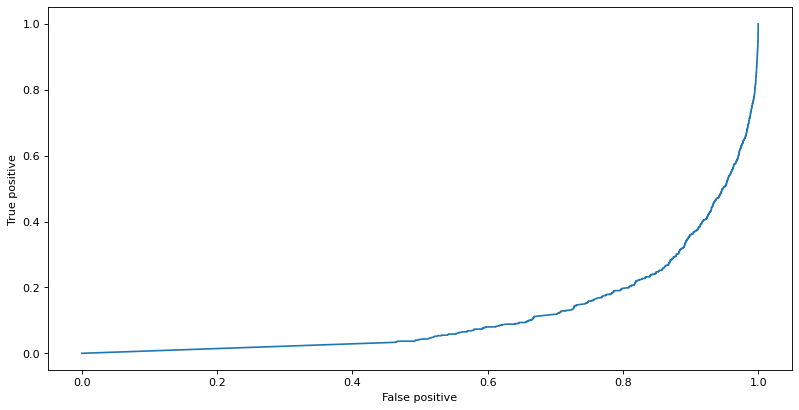

In [79]:
fig = plt.figure(figsize=(12,6), dpi=80)
ax = fig.add_subplot(1,1,1)
ax.plot(rf_fpr, rf_tpr)
ax.set_xlabel("False positive")
ax.set_ylabel("True positive")
plt.show()